<a href="https://colab.research.google.com/github/junghyeon0114/python_machine/blob/main/CH8_machin_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#8

#01) 텍스트 분석이해

비정형 데이터인 테스트를 분석

- 피처 벡터화(비처 추출) : 텍스트를 word 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여해 텍스트를 단어의 조합인 벡터값으로 표현.

**텍스트 분석 수행 프로세스**

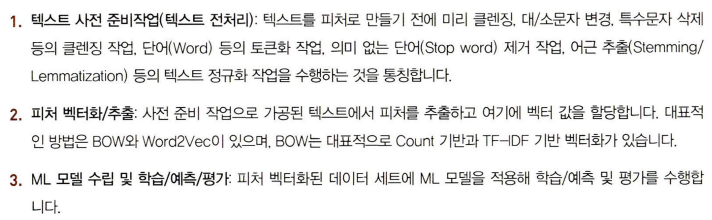

**파이썬 기반의 NLP, 텍스트 분석 패키지**

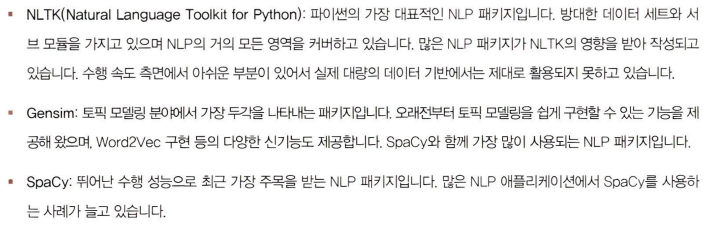

**02 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화**

텍스트 정규화 작업

- 클렌징 : 텍스트에서 분석에 방해가 되는 불필요 문자, 기호 사전 제거
- 토큰화 : 토큰화의 유형은 문서에서 문장을 분리하는 문장 토큰화, 문장에서 단어를 토큰으로 분리하는 단어 토큰화가 있음
- 필터링/스톱 워드 제거/ 철자 수정
    - 스톱 워드 제거 : is, the 와 같이 분석에 의미 없는 단어 사전 제거
- steemming : 원형 단어로 변환시 일반적인 방법을 적용하거나 더 단순화된 방법 적용 -> 원래 단어에서 일부 철자 훼손
- Lemmatization : 문법적, 의미적인 부분 감안해 정확한 어근 단어 찾아줌

    - Stemming, Lemmatization 은 원형 단어를 찾는다는 목적이 유사하지만 Lemmatization이 더 정확하고 변환에 오랜 시간 걸림.

In [1]:
# 문장 토큰화

from nltk import sent_tokenize
import nltk
nltk.download('punkt')  # 마침표, 개행문자 등의 데이터 세트 다운로드

text_sample = 'The Matrix is everywhere its all around us, here even in ths room. \
              You can see it out your window or on your television. \
              You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))  # list
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in ths room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


In [2]:
# 단어 토큰화

from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [3]:
# 문서를 먼저 문장으로 나누고, 개별 문장을 단어로 토큰화하는 함수 생성

from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)


<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'ths', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


In [5]:
# 스톱 워드 제거
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [7]:
# stopwords를 필터링으로 제거해 분석을 위한 의미 있는 단어만 추출

import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words = []
  # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환함
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)


[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'ths', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


In [8]:
# stemming

from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [9]:
# WordNetLemmatizer -> Lemmatization 수행
# 단어의 품사를 알려줘야 함. ( 동사: v, 형용사: a)
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


-> Stemmer 보다 정확

# 03) Bag of Words - BOW

문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값ㅇ르 부여해 피처를 추출하는 모델.

- 장점 : 쉽고 빠른 구축

- 단점 : 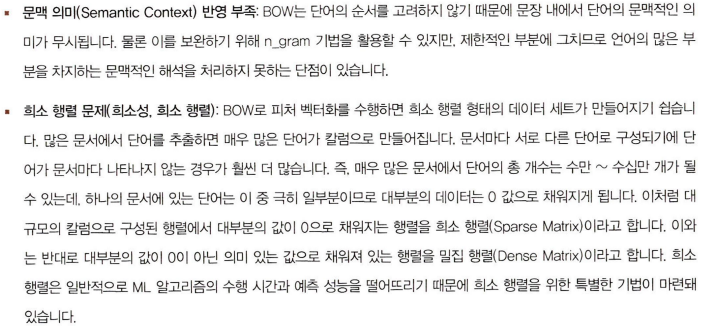

**BOW 피처 벡터화**

- 피처 벡터화 :
텍스트는 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환


- BOW 피처 벡터화 두 가지 방식

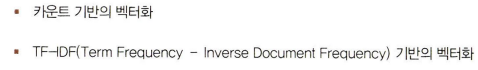

**사이킷런의 Count 및 TF-IDF 벡터화 구현 : CounterVectorizer, TfidfVectorizer**

- CounterVectorizer
    : 카운트 기반의 벡터 구현. 단지 피처 벡터화만 수행하지 않으며 소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리도 함께 수행. fit, transform 을 통해 피처 벡터화된 객체 반환

    - 입력 파라미터:

    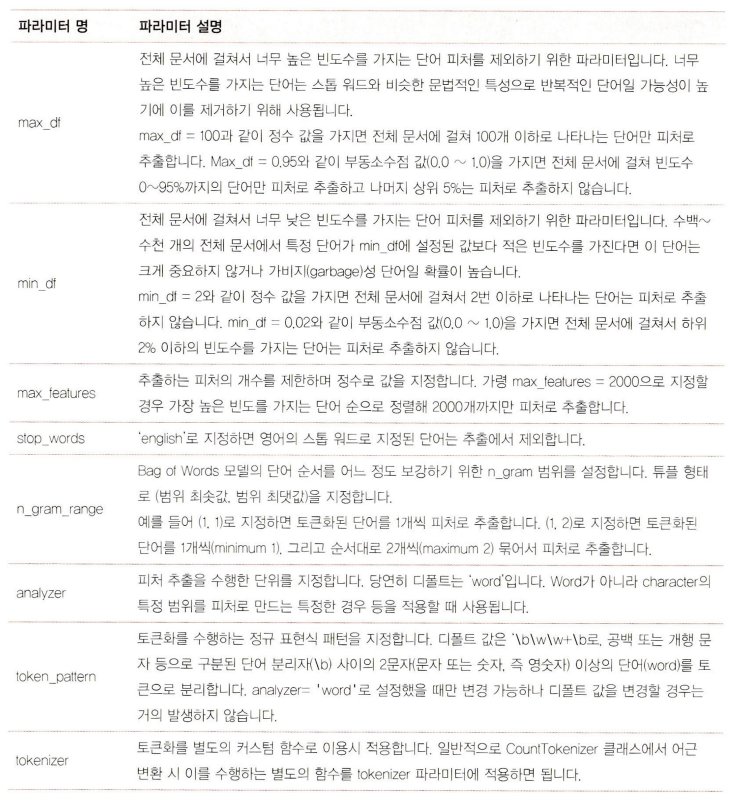

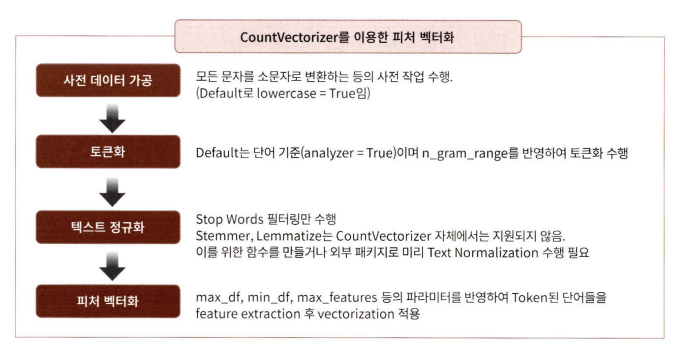

**BOW 벡터화를 위한 희소 행렬**

사이킷런의 CounterVectorizer/TfidVectorizer를 이용해 텍스트를 피처 단위로 벡터화해 변환하고 CSR 형태의 희소 행렬을 반환.

- 희소 행렬 : 대규모 행렬의 대부분의 값을 0이 차지하는 행렬


모든 문서에 있는 단어를 추출해 ㅣ를 피처로 벡터화하는 방법은 필연적으로 많은 피처 칼럼을 만들 수 밖에 없음. 모든 문서에 있는 단어를 중복을 제거하고 피처를 만들면 일반적으로 수만 개에서 수십 만 개의 단어가 만들어짐. 그런데 이러한 대규모 행렬이 생성되더라도 각 문서가 가지는 단어의 수는 제한적이기 때무에 행렬값은 대부분 0이 차지 -> 이러한 것을 희소 행렬.



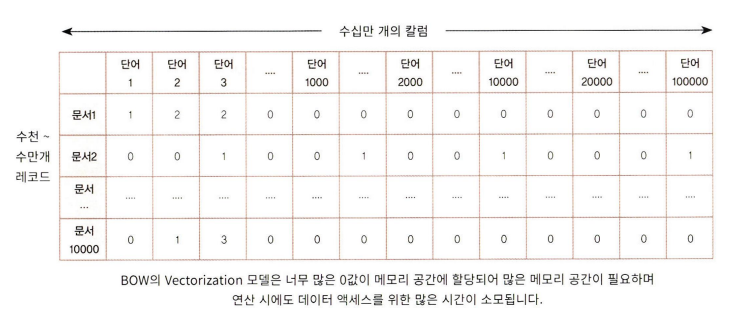

**희소 행렬 - COO 형식**

0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식.

희소 행렬 변환을 위해 주로 사이파이(Scipy) 이용.

In [10]:
import numpy as np

dense = np.array([ [3, 0, 1], [0, 2, 0] ])

In [11]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3, 1, 2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))


In [12]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

-> 다시 원래의 데이터 행렬로 추출됨

**희소 행렬 - CSR 형식**

0 이 아닌 데이터 배열과 열 위치 배열, 그리고 행 위치 배열의 고유한 값의 시작 위치 배열을 csr_matrix의 생성 파라미터로 입력

In [13]:
from scipy import sparse

dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

# 0이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [14]:
# 밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성
dense3 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)